In [ ]:
import pandas as pd
import seaborn as sb
import io
from google.colab import files

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded["Auto.csv"]))

Saving Auto.csv to Auto.csv


In [ ]:
print(df.head)
print(df.shape)

<bound method NDFrame.head of       mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0  70.0   
1    15.0          8         350.0         165    3693          11.5  70.0   
2    18.0          8         318.0         150    3436          11.0  70.0   
3    16.0          8         304.0         150    3433          12.0  70.0   
4    17.0          8         302.0         140    3449           NaN  70.0   
..    ...        ...           ...         ...     ...           ...   ...   
387  27.0          4         140.0          86    2790          15.6  82.0   
388  44.0          4          97.0          52    2130          24.6  82.0   
389  32.0          4         135.0          84    2295          11.6  82.0   
390  28.0          4         120.0          79    2625          18.6  82.0   
391  31.0          4         119.0          82    2720          19.4  82.0   

     origin                      

In [ ]:
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object


In [ ]:
df.cylinders = df.cylinders.astype('category').cat.codes
df.origin = df.origin.astype('category')
print(df.dtypes)

mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object


In [ ]:
df.dropna(inplace=True)
df.shape

(389, 9)

In [ ]:
average = df['mpg'].mean()
df['mpg_high'] = df['mpg'] > average
df['mpg_high'] = df['mpg_high'].astype('int64')
df = df.drop('mpg', axis=1)
df = df.drop('name', axis=1)
df.head

<bound method NDFrame.head of      cylinders  displacement  horsepower  weight  acceleration  year origin  \
0            4         307.0         130    3504          12.0  70.0      1   
1            4         350.0         165    3693          11.5  70.0      1   
2            4         318.0         150    3436          11.0  70.0      1   
3            4         304.0         150    3433          12.0  70.0      1   
6            4         454.0         220    4354           9.0  70.0      1   
..         ...           ...         ...     ...           ...   ...    ...   
387          1         140.0          86    2790          15.6  82.0      1   
388          1          97.0          52    2130          24.6  82.0      2   
389          1         135.0          84    2295          11.6  82.0      1   
390          1         120.0          79    2625          18.6  82.0      1   
391          1         119.0          82    2720          19.4  82.0      1   

     mpg_high  
0    

In [ ]:
print(df.index)

Int64Index([  0,   1,   2,   3,   6,   7,   8,   9,  10,  11,
            ...
            382, 383, 384, 385, 386, 387, 388, 389, 390, 391],
           dtype='int64', length=389)


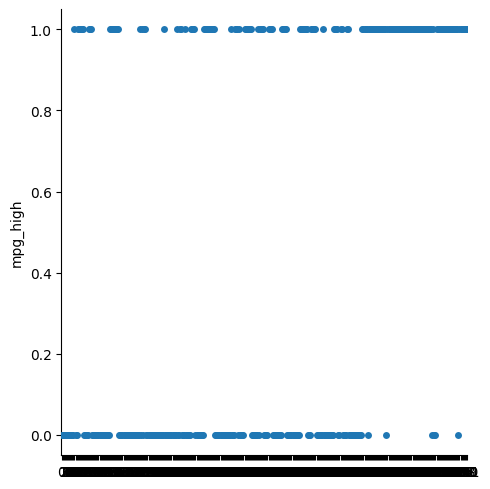

In [ ]:
sb.catplot(data=df, x=df.index, y='mpg_high')

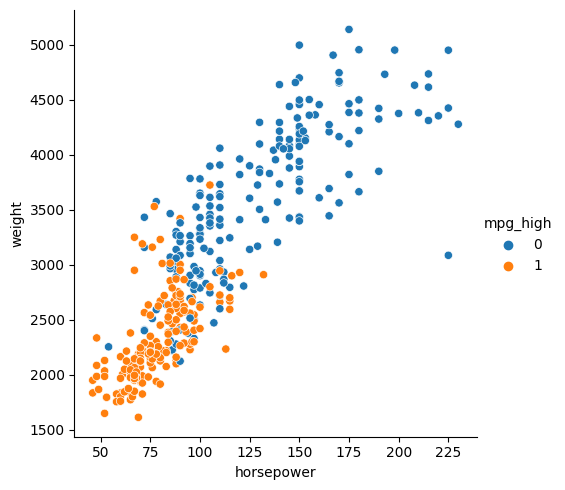

In [ ]:
sb.relplot(data=df, x='horsepower', y='weight', hue='mpg_high')

<Axes: xlabel='mpg_high', ylabel='weight'>

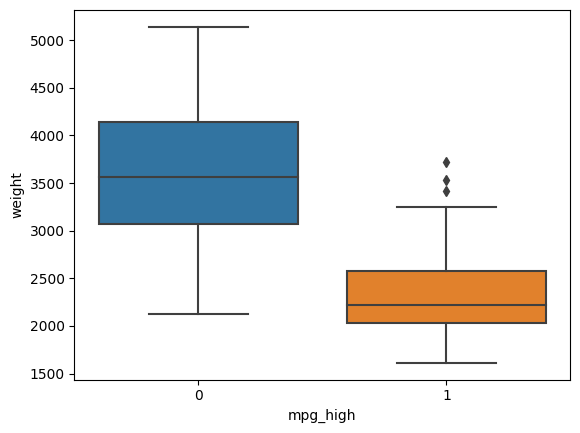

In [ ]:
sb.boxplot(data=df, x='mpg_high', y='weight')

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'mpg_high'], df.mpg_high, test_size=0.20, random_state=1234)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(311, 7)
(78, 7)
(311,)
(78,)


In [ ]:
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_model.fit(X_train, y_train)
print(lr_model.score(X_train, y_train))

0.9067524115755627


In [ ]:
y_pred = lr_model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88        41
           1       0.96      0.73      0.83        37

    accuracy                           0.86        78
   macro avg       0.88      0.85      0.85        78
weighted avg       0.88      0.86      0.86        78



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print(dtree.score(X_train, y_train))

1.0


In [ ]:
y_pred = dtree.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        45
           1       0.96      0.82      0.89        33

    accuracy                           0.91        78
   macro avg       0.92      0.90      0.91        78
weighted avg       0.92      0.91      0.91        78



[Text(0.6597222222222222, 0.9444444444444444, 'x[0] <= 2.5\ngini = 0.5\nsamples = 311\nvalue = [153, 158]'),
 Text(0.4583333333333333, 0.8333333333333334, 'x[2] <= 101.0\ngini = 0.239\nsamples = 173\nvalue = [24, 149]'),
 Text(0.3055555555555556, 0.7222222222222222, 'x[5] <= 75.5\ngini = 0.179\nsamples = 161\nvalue = [16, 145]'),
 Text(0.16666666666666666, 0.6111111111111112, 'x[1] <= 119.5\ngini = 0.362\nsamples = 59\nvalue = [14, 45]'),
 Text(0.05555555555555555, 0.5, 'x[4] <= 13.75\ngini = 0.159\nsamples = 46\nvalue = [4, 42]'),
 Text(0.027777777777777776, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.08333333333333333, 0.3888888888888889, 'x[3] <= 2683.0\ngini = 0.087\nsamples = 44\nvalue = [2, 42]'),
 Text(0.05555555555555555, 0.2777777777777778, 'x[3] <= 2377.0\ngini = 0.045\nsamples = 43\nvalue = [1, 42]'),
 Text(0.027777777777777776, 0.16666666666666666, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(0.08333333333333333, 0.16666666666666666, 'x[3]

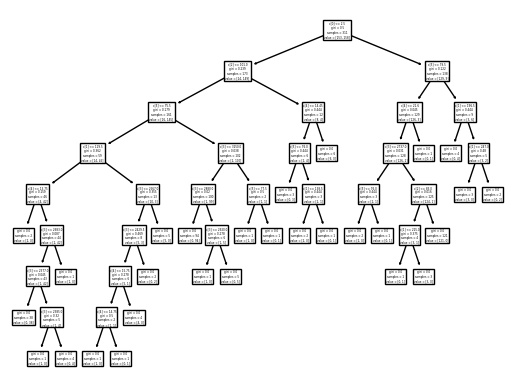

In [ ]:
tree.plot_tree(dtree)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model_1 = MLPClassifier(hidden_layer_sizes=(100, 50), activation='logistic')
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90        43
           1       0.96      0.77      0.86        35

    accuracy                           0.88        78
   macro avg       0.90      0.87      0.88        78
weighted avg       0.90      0.88      0.88        78



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
model_2 = MLPClassifier() #default network with hidden layer size (100,) and relu activatio function
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90        43
           1       0.96      0.77      0.86        35

    accuracy                           0.88        78
   macro avg       0.90      0.87      0.88        78
weighted avg       0.90      0.88      0.88        78



### Neural Net Outcomes

The first neural net with 2 hidden layers (100, 50) and a logistic activation function worked better than the default MLPClassifier

## Overall Analysis

The most successful model in terms of accuracy is the Decision Tree Classifier. The  Logistic Regression Classifier and first Neural Networks performed about the same with logistic regression. The default neural net performed the worst. While the recall of precision of each model is relatively equal, the accuracy has quite a large spread. from 79% to 91%

This data set is pretty small, so it makes sense that the neural nets did not perform better. Since the logistic regression model performed worse, it may be the case the is not simply linearly separable and a non linear clasifier (Decision Tree) is  necessary.

I prefer python to R because it is more programmer friendly. I also think the syntax is easier to comprehend. Even though R tries to be verbose to benefit non programmers, I think this is a situation where less is more.